<a href="https://colab.research.google.com/github/Apaulgithub/oibsip_taskno4/blob/main/Email_Spam_Detection_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import model selection libraries
from sklearn.model_selection import train_test_split

# Library used for ML Model implementation
from sklearn.naive_bayes import MultinomialNB

# Importing the Pipeline class from scikit-learn
from sklearn.pipeline import Pipeline

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [95]:
# Load Dataset from github repository
df = pd.read_csv("https://raw.githubusercontent.com/Apaulgithub/oibsip_taskno4/main/spam.csv", encoding='ISO-8859-1')

In [96]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [97]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  5572
Number of columns are:  5


In [98]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [99]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 403


In [100]:
# Missing Values/Null Values Count
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [101]:
# Dataset Columns
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [102]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [103]:
# Check Unique Values for each variable using a for loop.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in v1 is 2
No. of unique values in v2 is 5169
No. of unique values in Unnamed: 2 is 43
No. of unique values in Unnamed: 3 is 10
No. of unique values in Unnamed: 4 is 5


In [104]:
# Change the v1 & v2 columns as Category and Message
df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)

In [105]:
# Removing the all unnamed columns (its include much number of missing values)
df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'}, inplace=True)

In [106]:
# Create a binary 'Spam' column: 1 for 'spam' and 0 for 'ham', based on the 'Category' column.
df['Spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

new block

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
from nltk.stem import WordNetLemmatizer

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    tokens = [WordNetLemmatizer().lemmatize(word) for word in tokens if word not in stopwords.words('english')]  # Remove stopwords and lemmatize
    return ' '.join(tokens)

# Apply preprocessing to the dataset
df['Cleaned_Message'] = df['Message'].apply(preprocess_text)

In [108]:
# Updated new dataset
df.head()

,Category,Message,Spam,Cleaned_Message
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,0,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah dont think go usf life around though


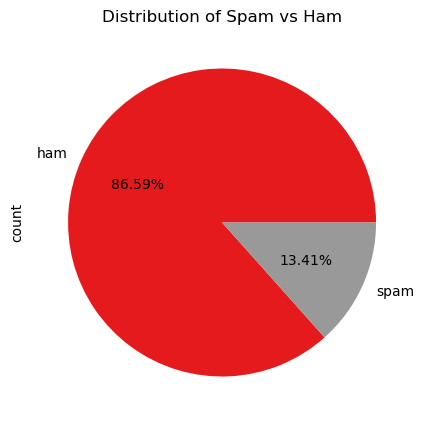

In [109]:
# Chart - 1 Pie Chart Visualization Code For Distribution of Spam vs Ham Messages
spread = df['Category'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set1')
plt.title(f'Distribution of Spam vs Ham')

# Display the Chart
plt.show()

In [110]:
# Splitting Spam Messages
df_spam = df[df['Category']=='spam'].copy()

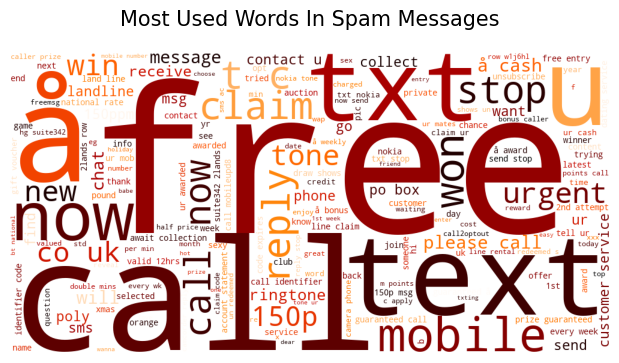

In [111]:
# Chart - 2 WordCloud Plot Visualization Code For Most Used Words in Spam Messages
# Create a String to Store All The Words
comment_words = ''

# Remove The Stopwords
stopwords = set(STOPWORDS)

# Iterate Through The Column
for val in df_spam.Message:

    # Typecaste Each Val to String
    val = str(val)

    # Split The Value
    tokens = val.split()

    # Converts Each Token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# Set Labels
plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Spam Messages', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display Chart
plt.show()

In [112]:
# Splitting the data to train and test
X_train,X_test,y_train,y_test=train_test_split(df.Message,df.Spam,test_size=0.25)

In [113]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")


    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

new


Train ROC AUC: 0.9696337051253285
Test ROC AUC: 0.9315211993971653


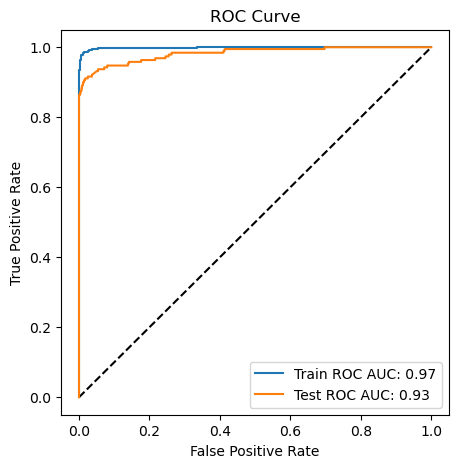


Confusion Matrix:


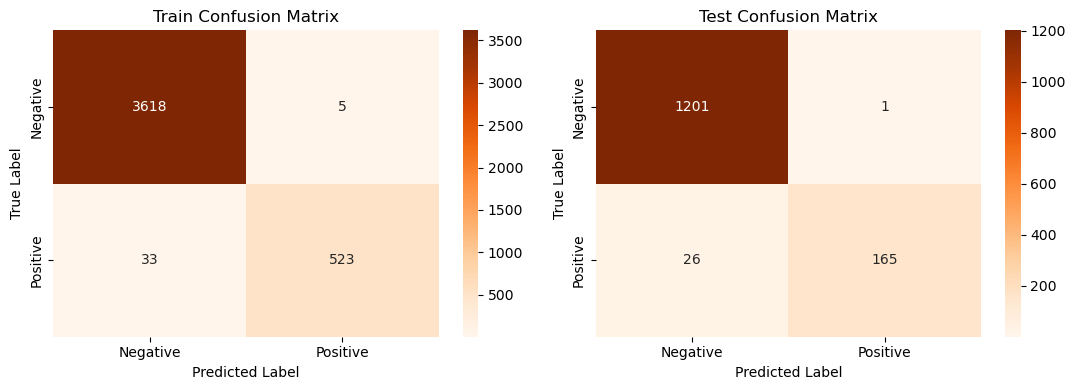


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.990961 | 0.99862  |   0.994776 | 3623        |
| 1            |    0.99053  | 0.940647 |   0.964945 |  556        |
| accuracy     |    0.990907 | 0.990907 |   0.990907 |    0.990907 |
| macro avg    |    0.990746 | 0.969634 |   0.97986  | 4179        |
| weighted avg |    0.990904 | 0.990907 |   0.990807 | 4179        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.97881  | 0.999168 |   0.988884 | 1202        |
| 1            |    0.993976 | 0.863874 |   0.92437  |  191        |
| accuracy     |    0.980617 | 0.980617 |   0.980617 |    0.980617 |
| macro avg    |    0.986393 | 0.931521 |   0.956627 | 1393        |
| weighted avg |    0.98089  | 0.980617 |   

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use TfidfVectorizer instead of CountVectorizer
clf_tfidf = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=3000)),  # Limit features for better generalization
    ('nb', MultinomialNB(alpha=0.1))  # Adjust alpha for smoothing
])

# Split using the cleaned messages
X_train, X_test, y_train, y_test = train_test_split(df.Cleaned_Message, df.Spam, test_size=0.25, random_state=42)

# Train and Evaluate
MultinomialNB_score_tfidf = evaluate_model(clf_tfidf, X_train, X_test, y_train, y_test)


new just to compare with old and new


Train ROC AUC: 0.891396295053386
Test ROC AUC: 0.8334146405205983


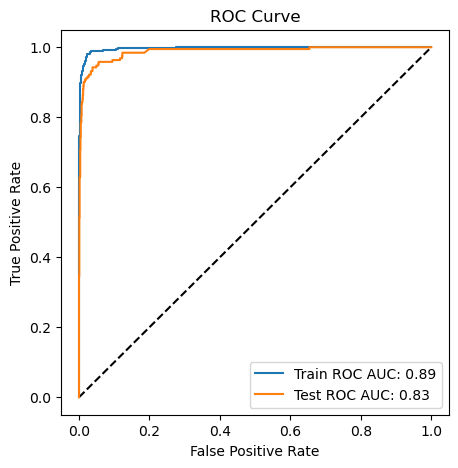


Confusion Matrix:


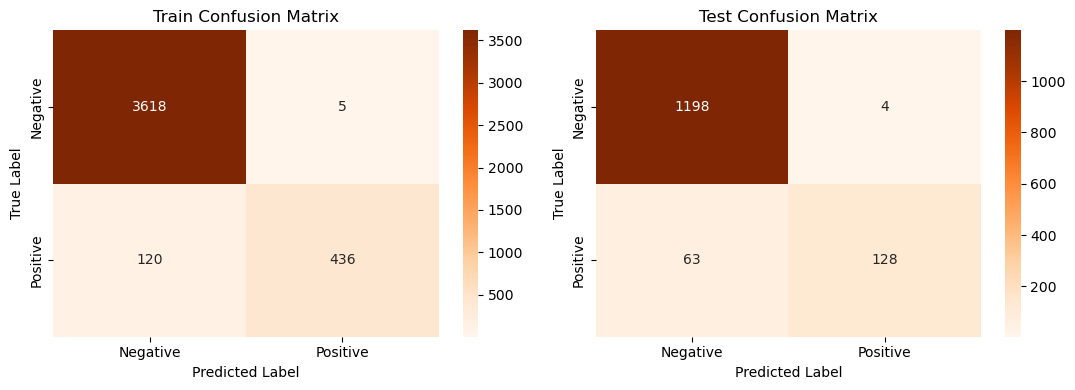


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.967897 | 0.99862  |   0.983019 | 3623        |
| 1            |    0.988662 | 0.784173 |   0.874624 |  556        |
| accuracy     |    0.970089 | 0.970089 |   0.970089 |    0.970089 |
| macro avg    |    0.97828  | 0.891396 |   0.928821 | 4179        |
| weighted avg |    0.97066  | 0.970089 |   0.968597 | 4179        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.95004  | 0.996672 |   0.972797 | 1202        |
| 1            |    0.969697 | 0.670157 |   0.79257  |  191        |
| accuracy     |    0.951902 | 0.951902 |   0.951902 |    0.951902 |
| macro avg    |    0.959868 | 0.833415 |   0.882684 | 1393        |
| weighted avg |    0.952735 | 0.951902 |   

In [115]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Pipeline
clf_lr = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=3000)),
    ('lr', LogisticRegression(max_iter=500))  # Increase max_iter for convergence
])

# Train and Evaluate
LogisticRegression_score = evaluate_model(clf_lr, X_train, X_test, y_train, y_test)


old one

In [116]:
# ML Model - 1 Implementation
# Create a machine learning pipeline using scikit-learn, combining text vectorization (CountVectorizer)
# and a Multinomial Naive Bayes classifier for email spam detection.
clf = Pipeline([
    ('vectorizer', CountVectorizer()),  # Step 1: Text data transformation
    ('nb', MultinomialNB())  # Step 2: Classification using Naive Bayes
])

# Model is trained (fit) and predicted in the evaluate model


Train ROC AUC: 0.982575352911157
Test ROC AUC: 0.9443161920359611


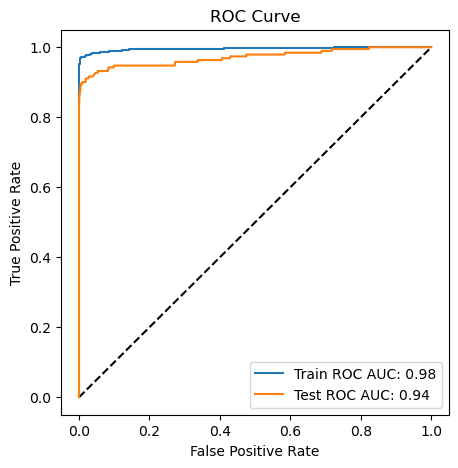


Confusion Matrix:


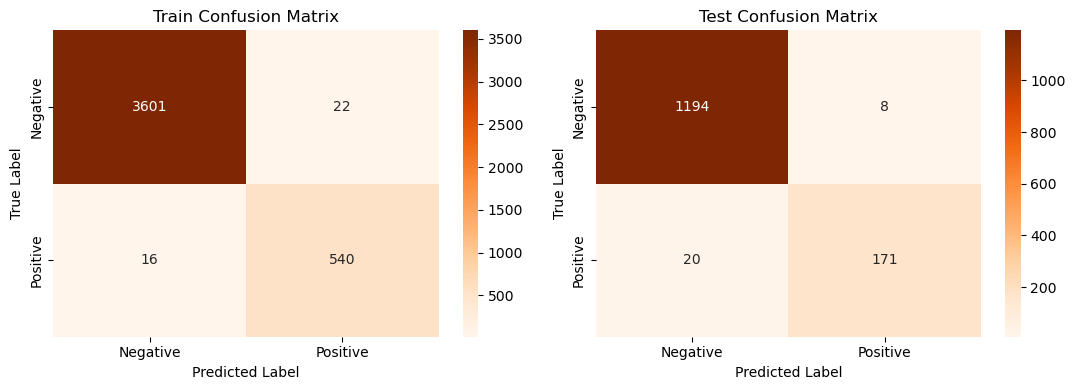


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.995576 | 0.993928 |   0.994751 | 3623        |
| 1            |    0.960854 | 0.971223 |   0.966011 |  556        |
| accuracy     |    0.990907 | 0.990907 |   0.990907 |    0.990907 |
| macro avg    |    0.978215 | 0.982575 |   0.980381 | 4179        |
| weighted avg |    0.990957 | 0.990907 |   0.990928 | 4179        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.983526 | 0.993344 |   0.988411 | 1202        |
| 1            |    0.955307 | 0.895288 |   0.924324 |  191        |
| accuracy     |    0.979899 | 0.979899 |   0.979899 |    0.979899 |
| macro avg    |    0.969416 | 0.944316 |   0.956367 | 1393        |
| weighted avg |    0.979656 | 0.979899 |   

In [117]:
MultinomialNB_score = evaluate_model(clf, X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.3s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.2s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.2s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estima

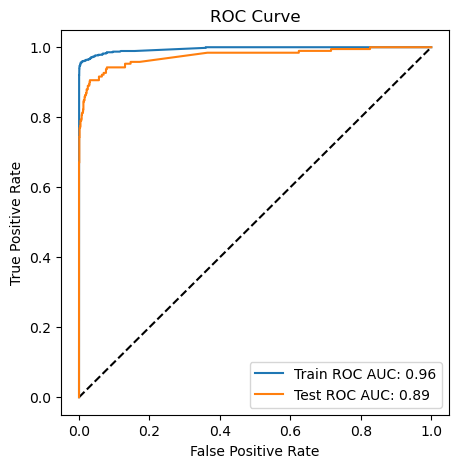


Confusion Matrix:


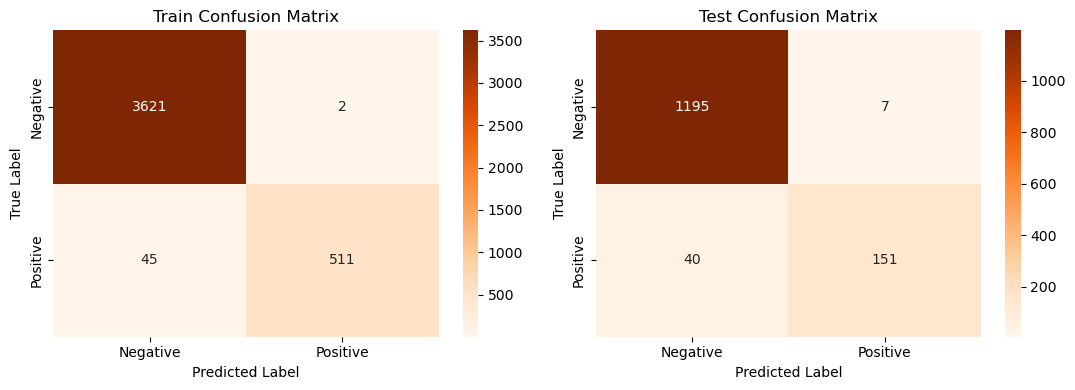


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.987725 | 0.999448 |   0.993552 | 3623        |
| 1            |    0.996101 | 0.919065 |   0.956034 |  556        |
| accuracy     |    0.988753 | 0.988753 |   0.988753 |    0.988753 |
| macro avg    |    0.991913 | 0.959256 |   0.974793 | 4179        |
| weighted avg |    0.988839 | 0.988753 |   0.98856  | 4179        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.967611 | 0.994176 |   0.980714 | 1202       |
| 1            |    0.955696 | 0.790576 |   0.86533  |  191       |
| accuracy     |    0.96626  | 0.96626  |   0.96626  |    0.96626 |
| macro avg    |    0.961654 | 0.892376 |   0.923022 | 1393       |
| weighted avg |    0.965978 | 0.96626  |   0.9648

In [118]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define XGBoost pipeline
clf_xgb = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=3000)),  # Use TF-IDF
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))  # XGBoost Classifier
])

# Define parameter grid for GridSearchCV
param_grid = {
    'xgb__n_estimators': [100, 200],
    'xgb__learning_rate': [0.01, 0.1, 0.3],
    'xgb__max_depth': [3, 5, 7],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf_xgb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best estimator for evaluation
best_xgb_model = grid_search.best_estimator_
xgb_score = evaluate_model(best_xgb_model, X_train, X_test, y_train, y_test)

In [122]:
import pickle

# Save the trained model
with open('spam_detection_model.pkl', 'wb') as model_file:
    pickle.dump(best_xgb_model, model_file)

print("Model saved as spam_detection_model.pkl")

Model saved as spam_detection_model.pkl


In [124]:
# Defining a function for the Email Spam Detection System
def detect_spam(email_text):
    # Load the trained classifier (clf) here
    # Replace the comment with your code to load the classifier model

    # Make a prediction using the loaded classifier
    # prediction = clf.predict([email_text])
    prediction = best_xgb_model.predict([email_text])  # Use the best XGBoost model

    if prediction == 0:
        return "This is a Ham Email!"
    else:
        return "This is a Spam Email!"


In [125]:
# Example of how to use the function
sample_email = 'Ringtone Club: Get the UK singles chart on your mobile each week and choose any top quality ringtone! This message is free of charge.'
result = detect_spam(sample_email)
print(result)

This is a Spam Email!


In [126]:
# Add features like word count and character count
df['Word_Count'] = df['Message'].apply(lambda x: len(x.split()))
df['Char_Count'] = df['Message'].apply(lambda x: len(x))

# Updated Dataset Preview
df.head()

,Category,Message,Spam,Cleaned_Message,Word_Count,Char_Count
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...,20,111
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni,6,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry wkly comp win fa cup final tkts st ...,28,155
3,ham,U dun say so early hor... U c already then say...,0,u dun say early hor u c already say,11,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah dont think go usf life around though,13,61
